In [34]:
import numpy as np
from scipy.stats import norm
import pandas as pd

<h1>Black-Scholes Call</h1>

In [35]:
def Black_Scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

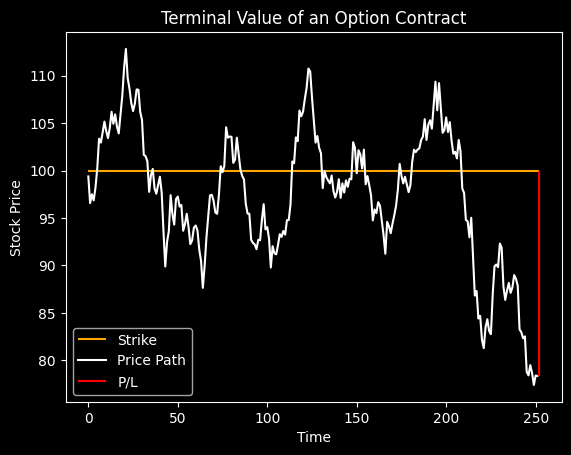

Premium at t=0: 14.231254785985819
P/L: -14.231254785985819


In [37]:
import matplotlib.pyplot as plt
import qfin as qf

# simulate dynamics of the underlying according to Geometric Brownian Motion
path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)


# create a chart of the price path and the strike price
plt.title("Terminal Value of an Option Contract")
plt.hlines(100, 0, 252, label='Strike', color='orange')
plt.plot(path.simulated_path, label='Price Path', color='white')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, path.simulated_path[-1], 100, color='red', label="P/L")
else:
    plt.vlines(252, 100, path.simulated_path[-1], color='green', label="P/L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# print the premium and the resulting P/L
premium = Black_Scholes_call(100, 100, .3, .05, 1)
print("Premium at t=0:", premium)
print("P/L:", max(path.simulated_path[-1] - 100, 0) - premium)